# Reloading Updated Module

If you've made changes to your `atac_mapper` package, you need to reload it to see the changes in the notebook. Let's do that first:

Now that we've reloaded the module, we can proceed with the rest of the notebook. Remember to rerun this reload cell whenever you make changes to your package files.

In [40]:
# Set required environment variable for scipy array API
import os

os.environ["SCIPY_ARRAY_API"] = "1"

# Import required packages
import numpy as np
import pandas as pd
import scanpy as sc

from scarches.models.scpoli import scPoli  # Import scPoli directly
from atac_mapper.reference_mapping.mapping_atac import AtlasMapper

import importlib
from atac_mapper.reference_mapping import mapping_atac

# Reload the module to make sure you're using the latest version
importlib.reload(mapping_atac)


# Now import the AtlasMapper from the reloaded module

In [41]:
adata_ref = sc.read_h5ad("/Users/nazbukina/code/test_data_atac_mapper/mannens_cistopic_adata_ZH.h5ad")
adata_ref

AnnData object with n_obs × n_vars = 99732 × 175
    obs: 'Transcriptome', 'Strain', 'Sex', 'Method', 'Editat', 'Donor', 'NPeaks', 'is__cell_barcode', 'Chemistry', 'Ageunit', 'sample_id', 'DoubletFinderScore', 'duplicate', 'Neuronprop', 'Plugdate', 'Analysis', 'CellID', 'Shortname', 'Splits', 'peak_region_fragments', 'cisTopic_log_nr_frag', 'regions', 'peak_region_cutsites', 'Datecaptured', 'mitochondrial', 'Clusters_main', 'cisTopic_nr_frag', 'Agetext', 'Project', 'ClusterName', 'Editby', 'All_fc_analysis_id', 'TSS_fragments', 'Tissue', 'chimeric', 'SubClusters', 'Sampleok', 'Celltype', 'Cellclass', 'batch', 'conditions_combined', 'presence_max_MBO', 'isDA'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'Agetext_colors', 'Cellclass_colors', 'Celltype_colors', 'Donor_colors', 'Shortname_colors', 'Tissue_colors', 'harmony', 'hvg', 'isDA_colors', 'neighbors', 'pca', 'scpoli', 'umap

In [42]:
# Load pre-trained scPoli model
ref_model = scPoli.load("/Users/nazbukina/code/test_data_atac_mapper/scpoli", adata=adata_ref)

# Initialize mapper with the loaded model
mapper = AtlasMapper(ref_model)

AnnData object with n_obs × n_vars = 99732 × 175
    obs: 'Transcriptome', 'Strain', 'Sex', 'Method', 'Editat', 'Donor', 'NPeaks', 'is__cell_barcode', 'Chemistry', 'Ageunit', 'sample_id', 'DoubletFinderScore', 'duplicate', 'Neuronprop', 'Plugdate', 'Analysis', 'CellID', 'Shortname', 'Splits', 'peak_region_fragments', 'cisTopic_log_nr_frag', 'regions', 'peak_region_cutsites', 'Datecaptured', 'mitochondrial', 'Clusters_main', 'cisTopic_nr_frag', 'Agetext', 'Project', 'ClusterName', 'Editby', 'All_fc_analysis_id', 'TSS_fragments', 'Tissue', 'chimeric', 'SubClusters', 'Sampleok', 'Celltype', 'Cellclass', 'batch', 'conditions_combined', 'presence_max_MBO', 'isDA'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'Agetext_colors', 'Cellclass_colors', 'Celltype_colors', 'Donor_colors', 'Shortname_colors', 'Tissue_colors', 'harmony', 'hvg', 'isDA_colors', 'neighbors', 'pca', 'scpoli', 'umap

/Users/nazbukina/miniconda3/envs/mapper_test/lib/python3.10/site-packages/scarches/models/scpoli/scpoli_model.py:156: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.obs_metadata_ = adata.obs.groupby(condition_keys).first()


## Load Query Dataset

Now we'll load the query dataset (`atlas_500_test.h5ad`) that we want to map to our reference.

In [43]:
# Load query dataset
adata_query = sc.read_h5ad("/Users/nazbukina/code/test_data_atac_mapper/atlas_aftersymphony_cistopic_ZH.h5ad")
adata_query

AnnData object with n_obs × n_vars = 104452 × 175
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'experiment', 'done_by', 'sample', 'age', 'protocol', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'percent.mt', 'percent.rp', 'S.Score', 'G2M.Score', 'Phase', 'RNA.weight', 'ATAC.weight', 'RNA_snn_res.0.5', 'nCount_ATAC_main', 'nFeature_ATAC_main', 'score_NPC', 'score_neuron', 'neuron_NPC', 'annot_revised', 'seurat_clusters', 'Consensus_line', 'Line_quality', 'final_region2', 'annot_level_1', 'annot_level_2', 'annot_level_3', 'annot_level_4', 'gaus_scanvi_q2r', 'cell_types_NA_24', 'region_NA_24', 'fullname_NA_24', 'wsnn_res.20', 'Celltype', 'regions', 'symphony_per_cell_dist', 'Cellclass_wknn', 'Celltype_wknn', 'Agetext_wknn', 'Tissue_wknn', 'pearsonr_topics_Mannens_matched', 'euclidean_topics_Mannens_matched'
    uns: 'Cellclass_wknn_colors', 'Celltype_colors', 'Celltype_wknn_colors', 'Consensus_line_colors', 'Tiss

## Set Up Reference Mapping

We'll now set up the reference mapping using the AtlasMapper with the loaded reference model. The mapper will help us project the query data onto the reference space.

In [44]:
# Map query data to reference
adata_query.obs["batch"] = adata_query.obs["sample"].copy()

mapped_adata = mapper.map_query(
    query_adata=adata_query,
    retrain="partial",  # Freeze encoder weights but update other parameters
    n_epochs=25,
    pretraining_epochs=20,
    eta=5,
    batch_size=2048,
    lr=0.001,
    query_layer="scaled2Mannens",  # Batch size for training
)

# Check the results
print("\nMapping complete!")
print(f"Mapped data shape: {mapped_adata.shape}")
print(f"Available representations: {list(mapped_adata.obsm.keys())}")

/Users/nazbukina/miniconda3/envs/mapper_test/lib/python3.10/site-packages/scarches/models/scpoli/scpoli_model.py:784: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_obs_metadata = adata.obs.groupby('conditions_combined').first()
/Users/nazbukina/miniconda3/envs/mapper_test/lib/python3.10/site-packages/scarches/models/scpoli/scpoli_model.py:156: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.obs_metadata_ = adata.obs.groupby(condition_keys).first()
INFO:scarches.trainers.scpoli.trainer:GPU available: False


Embedding dictionary:
 	Num conditions: [38]
 	Embedding dim: [5]
Encoder Architecture:
	Input Layer in, out and cond: 175 128 5
	Mean/Var Layer in/out: 128 20
Decoder Architecture:
	First Layer in, out and cond:  20 128 5
	Output Layer in/out:  128 175 

Initializing dataloaders
Starting training
 |████████████████----| 80.0%  - val_loss:  111.68 - val_cvae_loss:  111.68
Initializing unlabeled prototypes with Leiden with an unknown number of  clusters.
Clustering succesful. Found 27 clusters.
 |████████████████████| 100.0%  - val_loss:  115.50 - val_cvae_loss:  115.50 - val_prototype_loss:    0.00 - val_unlabeled_loss:    0.11

Mapping complete!
Mapped data shape: (104452, 175)
Available representations: ['X_pca_harmony', 'X_pca_harmony_symphony_R', 'X_pca_reference', 'X_scpoli_Mannens', 'X_tsne', 'X_umap', 'X_umap_scpoli_Mannens', 'X_umap_symphony_Mannens', 'X_scpoli']


## Visualize Results

Let's visualize the mapping results to see how well the query data aligns with the reference.

In [46]:
mapped_adata

AnnData object with n_obs × n_vars = 104452 × 175
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'experiment', 'done_by', 'sample', 'age', 'protocol', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'percent.mt', 'percent.rp', 'S.Score', 'G2M.Score', 'Phase', 'RNA.weight', 'ATAC.weight', 'RNA_snn_res.0.5', 'nCount_ATAC_main', 'nFeature_ATAC_main', 'score_NPC', 'score_neuron', 'neuron_NPC', 'annot_revised', 'seurat_clusters', 'Consensus_line', 'Line_quality', 'final_region2', 'annot_level_1', 'annot_level_2', 'annot_level_3', 'annot_level_4', 'gaus_scanvi_q2r', 'cell_types_NA_24', 'region_NA_24', 'fullname_NA_24', 'wsnn_res.20', 'Celltype', 'regions', 'symphony_per_cell_dist', 'Cellclass_wknn', 'Celltype_wknn', 'Agetext_wknn', 'Tissue_wknn', 'pearsonr_topics_Mannens_matched', 'euclidean_topics_Mannens_matched', 'batch', np.str_('Cellclass'), 'conditions_combined'
    uns: 'Cellclass_wknn_colors', 'Celltype_colors', 

In [7]:
adata_ref

AnnData object with n_obs × n_vars = 99732 × 175
    obs: 'Transcriptome', 'Strain', 'Sex', 'Method', 'Editat', 'Donor', 'NPeaks', 'is__cell_barcode', 'Chemistry', 'Ageunit', 'sample_id', 'DoubletFinderScore', 'duplicate', 'Neuronprop', 'Plugdate', 'Analysis', 'CellID', 'Shortname', 'Splits', 'peak_region_fragments', 'cisTopic_log_nr_frag', 'regions', 'peak_region_cutsites', 'Datecaptured', 'mitochondrial', 'Clusters_main', 'cisTopic_nr_frag', 'Agetext', 'Project', 'ClusterName', 'Editby', 'All_fc_analysis_id', 'TSS_fragments', 'Tissue', 'chimeric', 'SubClusters', 'Sampleok', 'Celltype', 'Cellclass', 'batch', 'conditions_combined', 'presence_max_MBO', 'isDA'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'Agetext_colors', 'Cellclass_colors', 'Celltype_colors', 'Donor_colors', 'Shortname_colors', 'Tissue_colors', 'harmony', 'hvg', 'isDA_colors', 'neighbors', 'pca', 'scpoli', 'umap

In [8]:
import cellmapper

In [26]:
cmap = cellmapper.CellMapper(query=mapped_adata, reference=adata_ref)
cmap.compute_neighbors(use_rep="X_scpoli", only_yx=False, n_neighbors=50)
cmap.compute_mapping_matrix("hnoca")
cmap.map_obs(key="Cellclass", prediction_postfix="mannens")

INFO     Initialized CellMapper with 104452 query cells and 99732 reference cells.                                 
INFO     Using sklearn to compute 50 neighbors.                                                                    
INFO     Computing mapping matrix using method 'hnoca'.                                                            
INFO     Row-normalizing the mapping matrix.                                                                       
INFO     Mapping categorical data for key 'Cellclass' using one-hot encoding.                                      
INFO     Categorical data mapped and stored in query.obs['Cellclass_mannens'].                                     


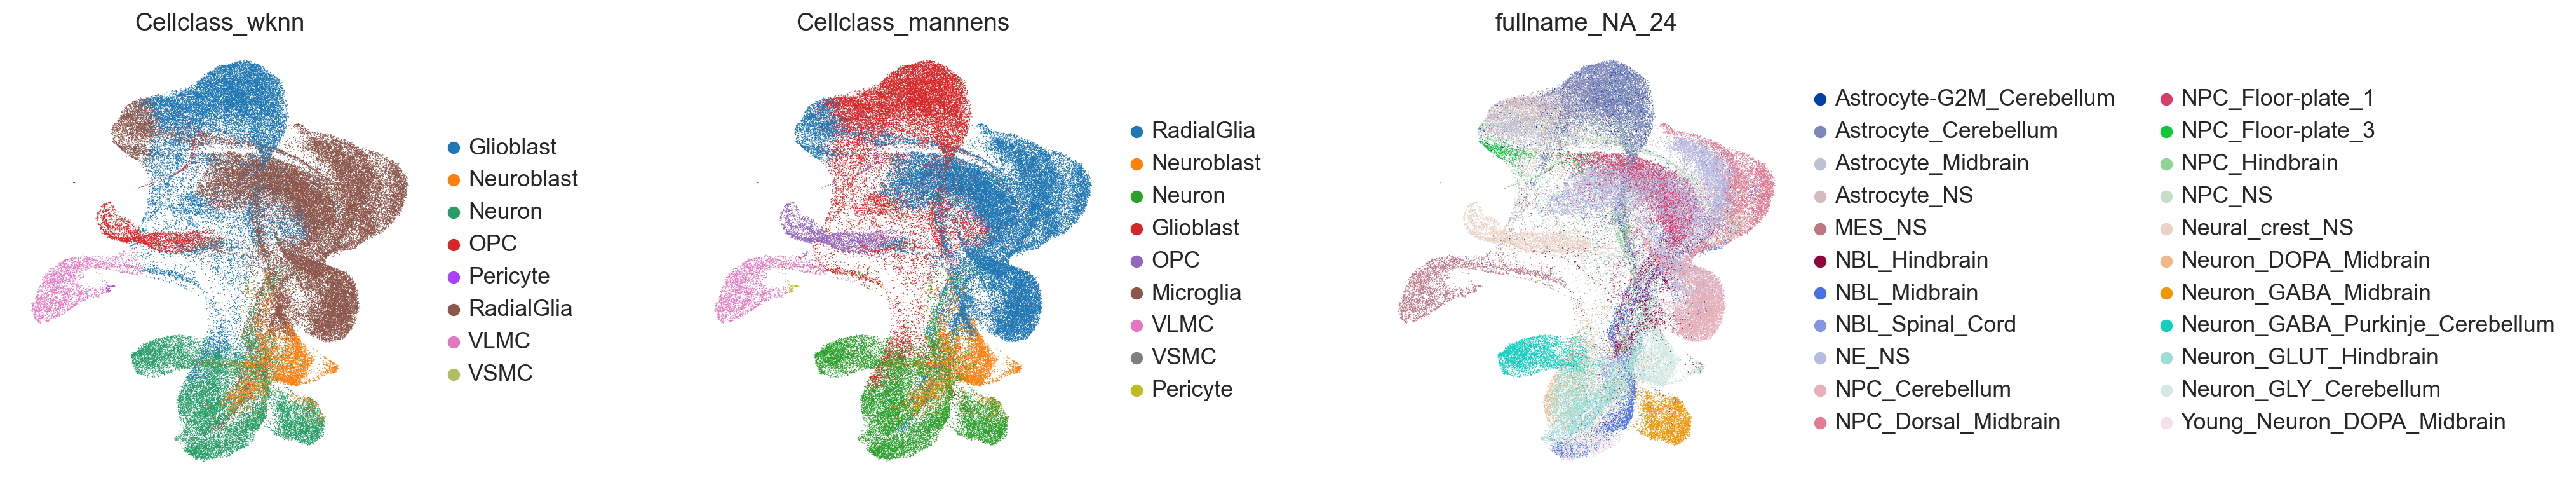

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

with plt.rc_context({"figure.figsize": (4, 4.5)}):
    sc.pl.embedding(
        mapped_adata,
        basis="X_umap_scpoli_Mannens",
        color=["Cellclass_wknn", "Cellclass_mannens", "fullname_NA_24"],
        frameon=False,
        ncols=3,
        wspace=0.5,
    )

In [28]:
freq_ct_regions = pd.crosstab(mapped_adata.obs.Cellclass_wknn, mapped_adata.obs.Cellclass_mannens)

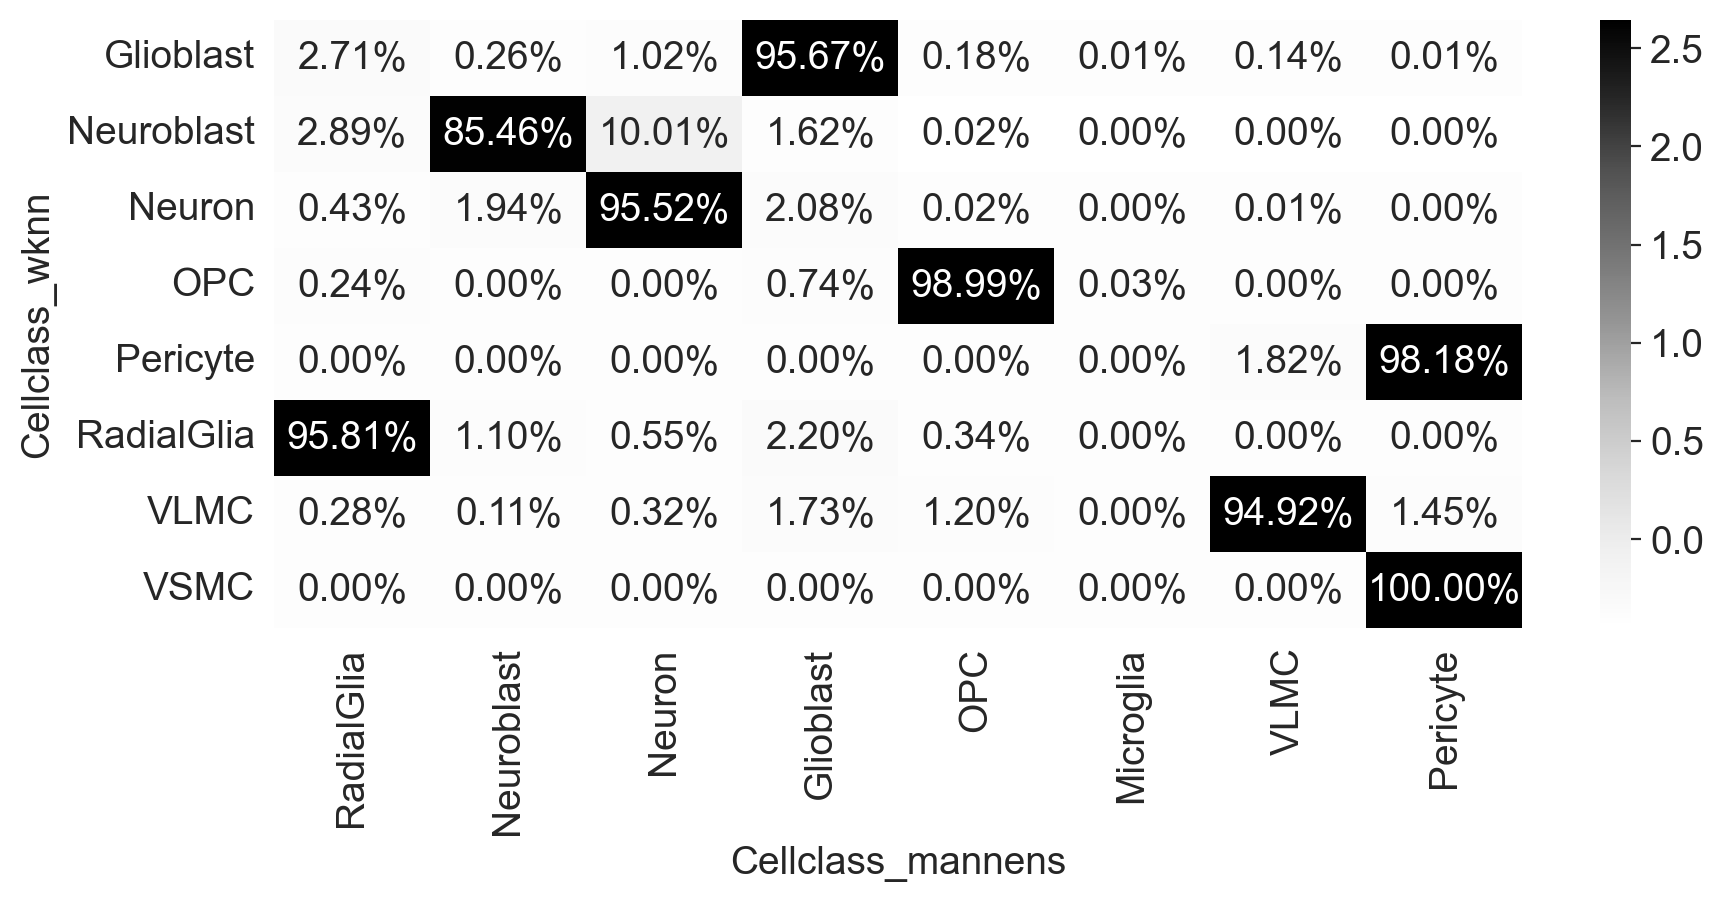

In [29]:
sns.set_style("white")
prop_ct_regions = freq_ct_regions.apply(lambda x: x / np.sum(x), axis=1)
mat = prop_ct_regions.apply(lambda x: (x - np.mean(x)) / np.std(x), axis=1)
with plt.rc_context({"figure.figsize": (10, 4)}):
    svm = sns.heatmap(mat, annot=prop_ct_regions, cmap="Greys", fmt=".2%")
plt.show()

In [30]:
cmap.estimate_presence_score(key_added="MBO_presence-score_hnoca", groupby="sample")

INFO     Presence score across all query cells computed and stored in `reference.obs['MBO_presence-score_hnoca']`  
INFO     Presence scores per group defined in `query.obs['sample']` computed and stored in                         
         `reference.obsm['MBO_presence-score_hnoca']`                                                              


In [31]:
adata_ref.obs["presence_max_MBO_hnoca"] = adata_ref.obsm["MBO_presence-score"].max(axis=1) ** 0.5

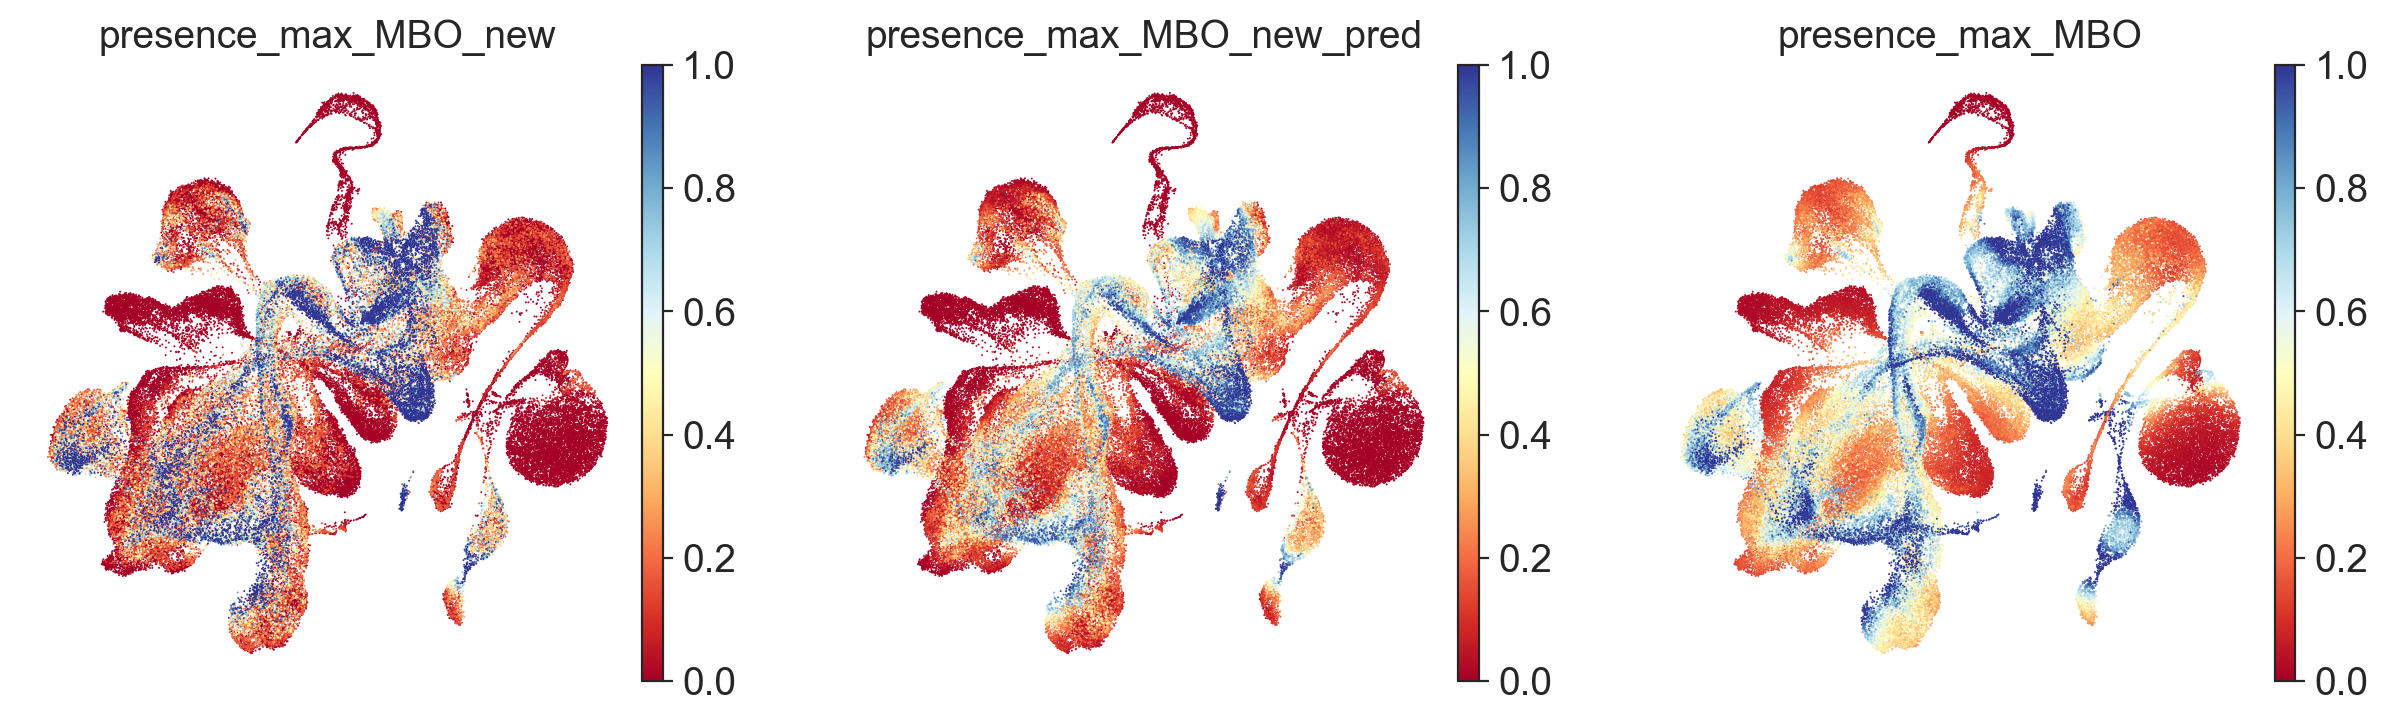

In [32]:
smap = cellmapper.CellMapper(query=adata_ref)
smap

INFO     Initialized CellMapper for self-mapping with 99732 cells.                                                 


CellMapper(self-mapping, data=AnnData(n_obs=99,732, n_vars=175), 

In [33]:
adata_ref

AnnData object with n_obs × n_vars = 99732 × 175
    obs: 'Transcriptome', 'Strain', 'Sex', 'Method', 'Editat', 'Donor', 'NPeaks', 'is__cell_barcode', 'Chemistry', 'Ageunit', 'sample_id', 'DoubletFinderScore', 'duplicate', 'Neuronprop', 'Plugdate', 'Analysis', 'CellID', 'Shortname', 'Splits', 'peak_region_fragments', 'cisTopic_log_nr_frag', 'regions', 'peak_region_cutsites', 'Datecaptured', 'mitochondrial', 'Clusters_main', 'cisTopic_nr_frag', 'Agetext', 'Project', 'ClusterName', 'Editby', 'All_fc_analysis_id', 'TSS_fragments', 'Tissue', 'chimeric', 'SubClusters', 'Sampleok', 'Celltype', 'Cellclass', 'batch', 'conditions_combined', 'presence_max_MBO', 'isDA', 'MBO_presence-score', 'presence_max_MBO_new', 'presence_max_MBO_new_pred', 'MBO_presence-score_hnoca', 'presence_max_MBO_hnoca'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'Agetext_colors', 'Cellclass_colors', 'Celltype_c

In [34]:
smap.compute_neighbors(use_rep="X_scpoli", n_neighbors=50)

INFO     Using sklearn to compute 50 neighbors.                                                                    


In [35]:
smap.compute_mapping_matrix("gaussian")

INFO     Computing mapping matrix using method 'gaussian'.                                                         
INFO     Row-normalizing the mapping matrix.                                                                       


In [37]:
smap.map_obs(key="presence_max_MBO_hnoca")

INFO     Mapping numerical data for key 'presence_max_MBO_hnoca' using direct matrix multiplication.               
INFO     Numerical data mapped and stored in query.obs['presence_max_MBO_hnoca_pred'].                             


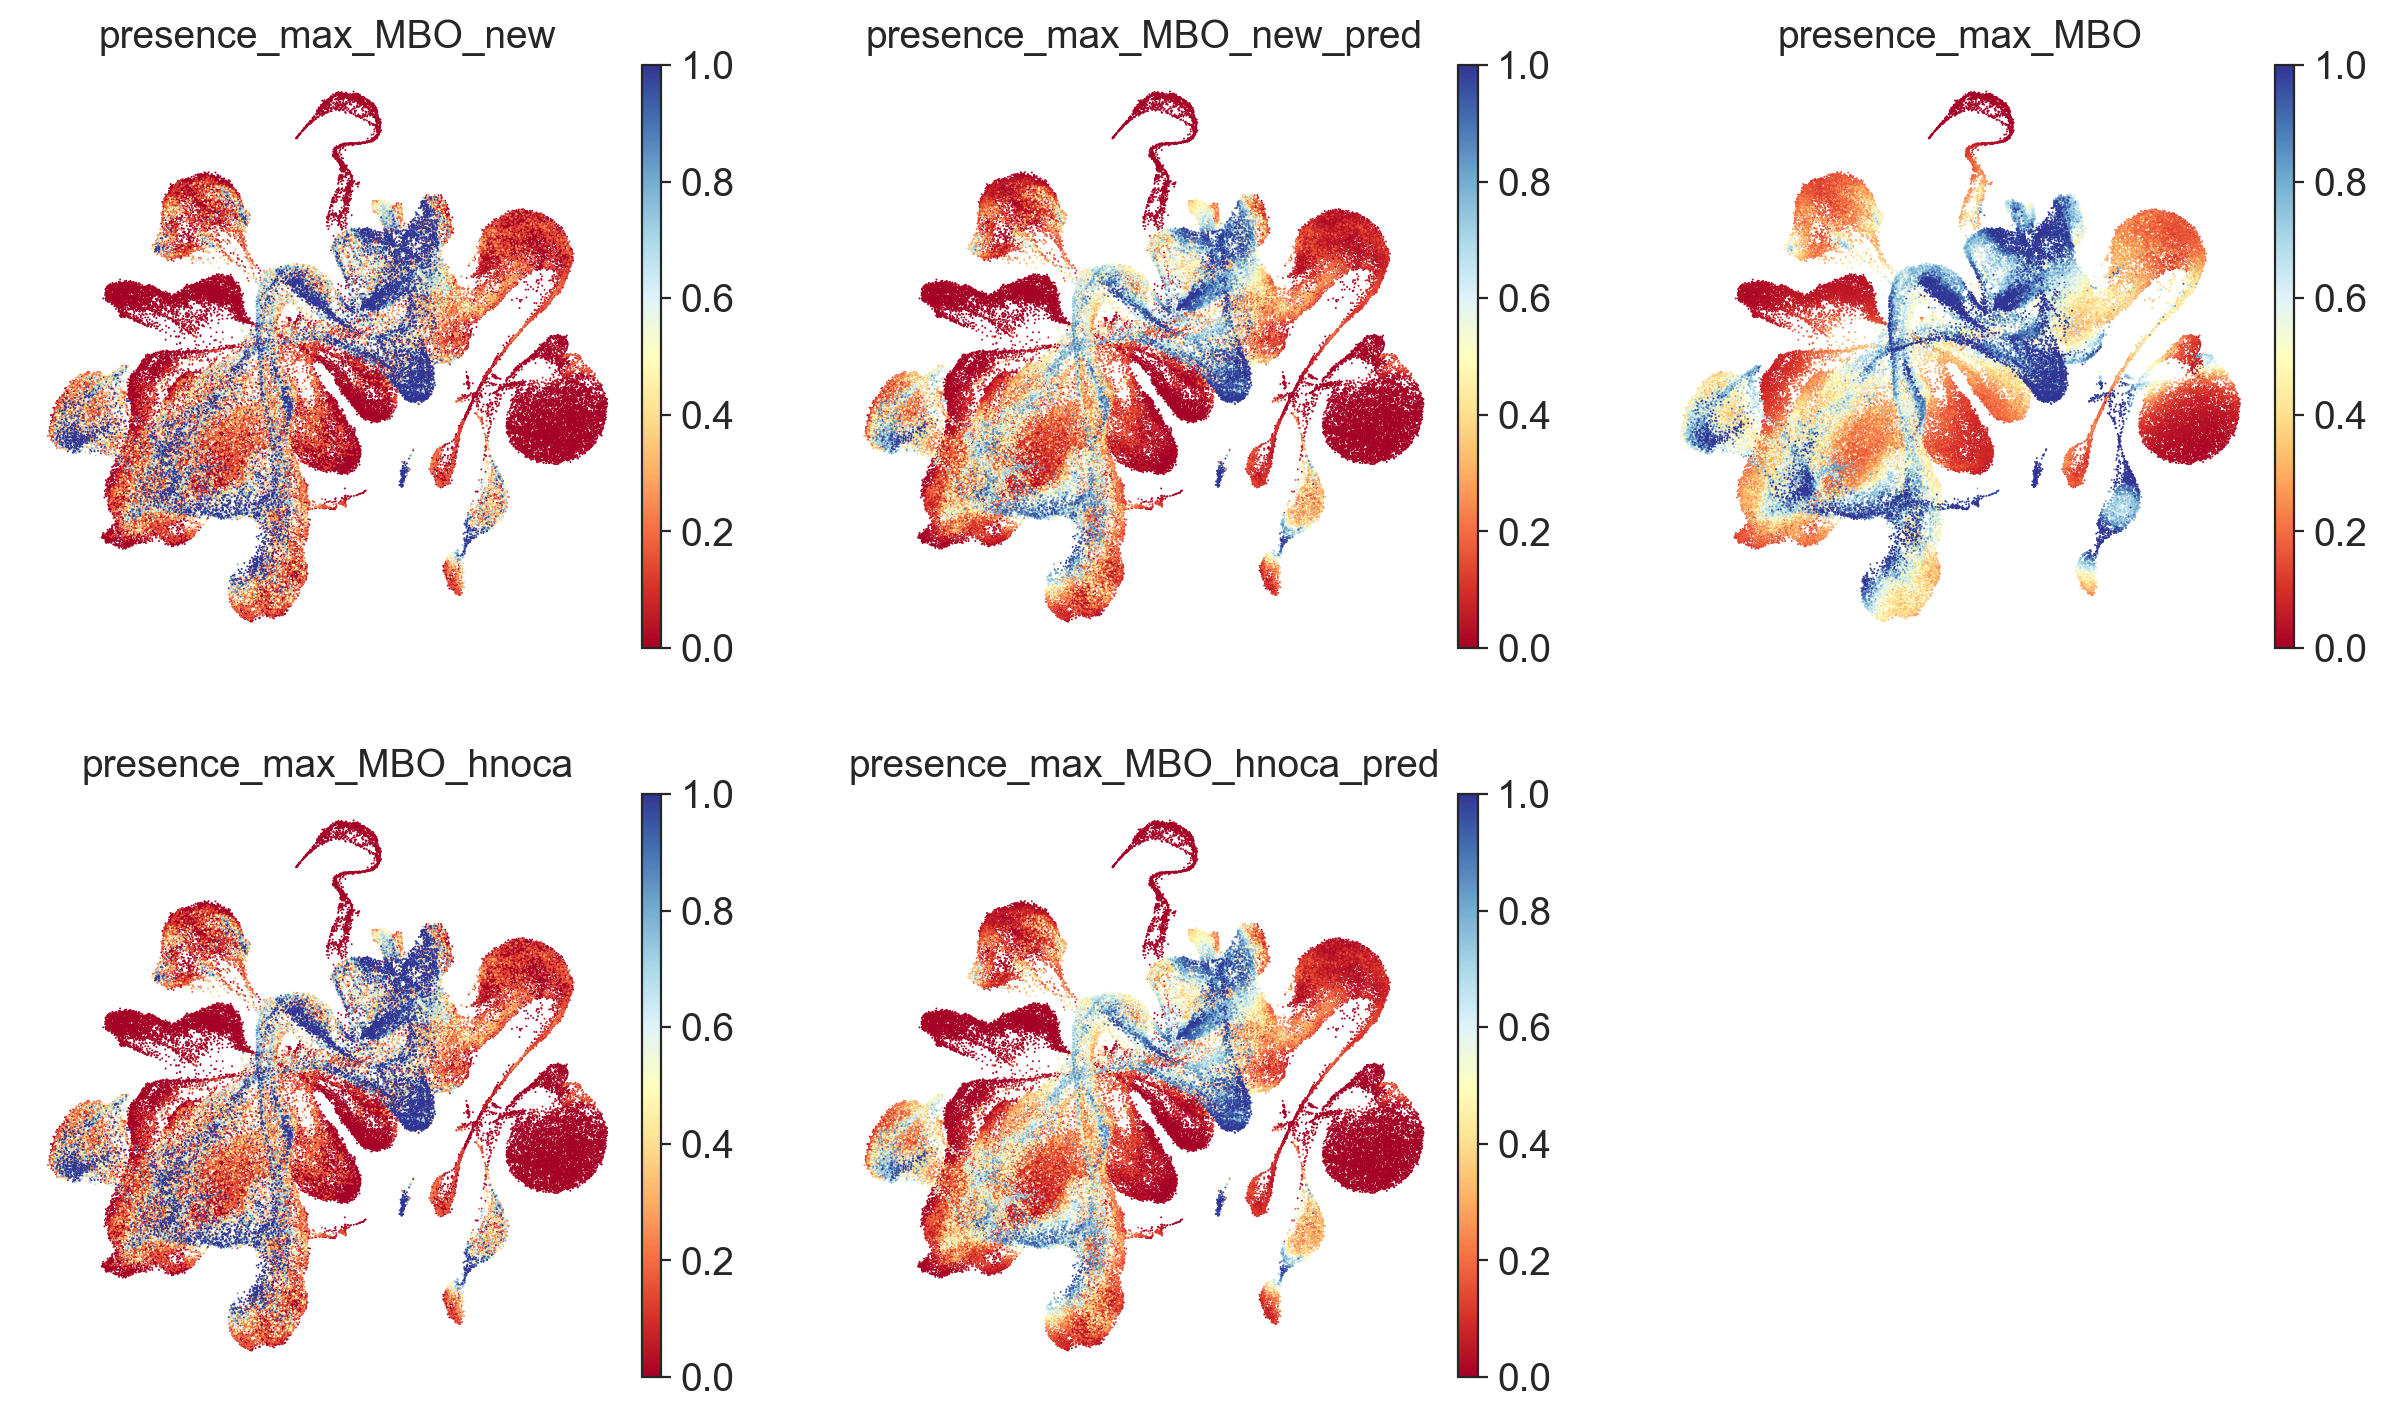

In [39]:
# fig, ax = plt.subplots(1,2,figsize=(3,6))
sc.pl.embedding(
    adata_ref,
    basis="X_umap_scpoli",
    color=[
        "presence_max_MBO_new",
        "presence_max_MBO_new_pred",
        "presence_max_MBO",
        "presence_max_MBO_hnoca",
        "presence_max_MBO_hnoca_pred",
    ],
    frameon=False,
    ncols=3,
    color_map="RdYlBu",
    show=False,
    size=2,
)
# fig.show()
plt.show()

# Try to use HNOCA

In [6]:
import os

os.environ["SCIPY_ARRAY_API"] = "1"
import hnoca.mapping as hmap

import scanpy as sc
from scarches.models.scpoli import scPoli  # Import scPoli directly

In [7]:
adata_ref = sc.read_h5ad("/Users/nazbukina/code/test_data_atac_mapper/mannens_cistopic_adata_ZH.h5ad")
adata_ref

AnnData object with n_obs × n_vars = 99732 × 175
    obs: 'Transcriptome', 'Strain', 'Sex', 'Method', 'Editat', 'Donor', 'NPeaks', 'is__cell_barcode', 'Chemistry', 'Ageunit', 'sample_id', 'DoubletFinderScore', 'duplicate', 'Neuronprop', 'Plugdate', 'Analysis', 'CellID', 'Shortname', 'Splits', 'peak_region_fragments', 'cisTopic_log_nr_frag', 'regions', 'peak_region_cutsites', 'Datecaptured', 'mitochondrial', 'Clusters_main', 'cisTopic_nr_frag', 'Agetext', 'Project', 'ClusterName', 'Editby', 'All_fc_analysis_id', 'TSS_fragments', 'Tissue', 'chimeric', 'SubClusters', 'Sampleok', 'Celltype', 'Cellclass', 'batch', 'conditions_combined', 'presence_max_MBO', 'isDA'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'Agetext_colors', 'Cellclass_colors', 'Celltype_colors', 'Donor_colors', 'Shortname_colors', 'Tissue_colors', 'harmony', 'hvg', 'isDA_colors', 'neighbors', 'pca', 'scpoli', 'umap

In [8]:
ref_model = scPoli.load("/Users/nazbukina/code/test_data_atac_mapper/scpoli", adata=adata_ref)

AnnData object with n_obs × n_vars = 99732 × 175
    obs: 'Transcriptome', 'Strain', 'Sex', 'Method', 'Editat', 'Donor', 'NPeaks', 'is__cell_barcode', 'Chemistry', 'Ageunit', 'sample_id', 'DoubletFinderScore', 'duplicate', 'Neuronprop', 'Plugdate', 'Analysis', 'CellID', 'Shortname', 'Splits', 'peak_region_fragments', 'cisTopic_log_nr_frag', 'regions', 'peak_region_cutsites', 'Datecaptured', 'mitochondrial', 'Clusters_main', 'cisTopic_nr_frag', 'Agetext', 'Project', 'ClusterName', 'Editby', 'All_fc_analysis_id', 'TSS_fragments', 'Tissue', 'chimeric', 'SubClusters', 'Sampleok', 'Celltype', 'Cellclass', 'batch', 'conditions_combined', 'presence_max_MBO', 'isDA'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'Agetext_colors', 'Cellclass_colors', 'Celltype_colors', 'Donor_colors', 'Shortname_colors', 'Tissue_colors', 'harmony', 'hvg', 'isDA_colors', 'neighbors', 'pca', 'scpoli', 'umap

/Users/nazbukina/miniconda3/envs/py3_11/lib/python3.11/site-packages/scarches/models/scpoli/scpoli_model.py:156: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.obs_metadata_ = adata.obs.groupby(condition_keys).first()


In [10]:
mapper2 = hmap.AtlasMapper(ref_model)

RuntimeError: This function relies on scvi-tools (>=1.2). Please install scvi-tools, either directly or via the corresponding hnoca extra: `pip install 'hnoca[mapping]'`.